# Uber Trip Classification

Tujuan :
* Membuat model yang dapat memprediksi apabila terjadi kesalahan dalam pencatatan data perjalanan Uber.

Masalah :
* Tidak ada kolom label untuk menjadi target.
* Data tanggal tidak ada notasi AM / PM.

Landasan Teori :
* Dengan asumsi batas kecepatan di kawasan perkotaan adalah 50 km/jam, kawasan permukiman adalah 30 km/jam dan kawasan jalanan antar kota paling rendah adalah 60 km/jam. [Kumparan](https://kumparan.com/info-otomotif/batas-kecepatan-untuk-dalam-kota-begini-aturannya-1xvq35hLvXP/3)
* Waktu tunggu maksimal adalah 5 menit. [therideshareguy](https://therideshareguy.com/uber-extends-wait-time/)


Label Feature Description :
* 0 = False
* 1 = True

## Import Libs

In [1]:
import pandas as pd
import os
from datetime import date, datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Load Data

In [2]:
path = os.path.join("dataset", "all-data_clean.csv")

In [3]:
uber_df = pd.read_csv(path) 

## Explore Data

In [4]:
uber_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,2962,3675
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,951,0
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614


In [5]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90287 entries, 0 to 90286
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90287 non-null  int64  
 1   vendor_id           90287 non-null  object 
 2   pickup_datetime     90287 non-null  object 
 3   dropoff_datetime    90287 non-null  object 
 4   pickup_longitude    90287 non-null  float64
 5   pickup_latitude     90287 non-null  float64
 6   dropoff_longitude   90287 non-null  float64
 7   dropoff_latitude    90287 non-null  float64
 8   store_and_fwd_flag  90287 non-null  object 
 9   trip_duration       90287 non-null  int64  
 10  dist_meters         90287 non-null  int64  
 11  wait_sec            90287 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 8.3+ MB


In [6]:
# check unique value
for i in uber_df[["id", "vendor_id", "store_and_fwd_flag"]] :
    print(f"{i} : {uber_df[i].nunique()}")

id : 90287
vendor_id : 139
store_and_fwd_flag : 1


Dapat disimpulkan bahwa tidak ada dupilkat dari kolom `id`, `store_and_fwd_flag` hanya memiliki satu nilai unik dan `datetime` masih dalam tipe data objek

In [7]:
uber_df = uber_df.drop(["id", "store_and_fwd_flag"], axis=1)

In [8]:
uber_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pickup_longitude,90287.0,4.001300e-01,2.308011e-01,8.983153e-06,0.200113,0.400801,0.600672,7.994377e-01
pickup_latitude,90287.0,3.991268e-01,2.308110e-01,8.983153e-06,0.199008,0.398292,0.599134,7.992232e-01
dropoff_longitude,90287.0,-8.711470e+01,1.275267e+01,-1.233418e+02,-100.162537,-79.023126,-78.484563,1.748119e+02
dropoff_latitude,90287.0,9.000339e+00,1.254712e+01,-5.315816e+01,-0.203951,4.562602,21.839787,6.032165e+01
trip_duration,90287.0,3.505614e+04,8.947615e+05,-2.207486e+08,493.000000,933.000000,1924.500000,7.696342e+07
dist_meters,90287.0,1.751764e+05,2.370332e+07,-2.147484e+09,2278.000000,4668.000000,8872.000000,2.147484e+09
wait_sec,90287.0,9.637481e+06,4.497338e+08,0.000000e+00,88.000000,214.000000,484.000000,9.516306e+10


Terdapat nilai yang tidak realistis minimal dan maksimal pada `trip_duration`, `dist_meters`, dan `wait_sec	`

### Visualisasi Data

Membuat visualisasi untuk menjelaskan sebaran data yang tidak realistis / bermasalah

Text(0, 0.5, 'jam')

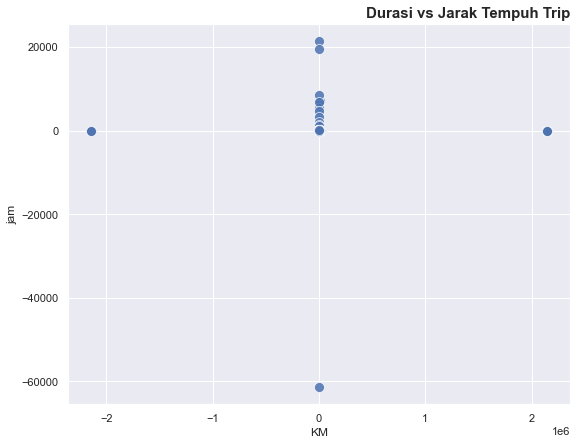

In [9]:
plt.figure(figsize=(9, 7))
sns.scatterplot(
    data=uber_df,
    x=uber_df.dist_meters/1000,
    y=uber_df.trip_duration/3600,
    s=100,
    alpha=0.85
)

plt.title("Durasi vs Jarak Tempuh Trip",
    loc="right",
    fontweight="bold",
    size=15
)

plt.xlabel("KM")
plt.ylabel("jam")

Waktu dan jarak tempuh seharusnya tidak ada yang negatif, waktu tempuh paling lama adalah 2.14e+4 jam, serta jarak tempuh paling lama adalah 2.15e+6 KM.

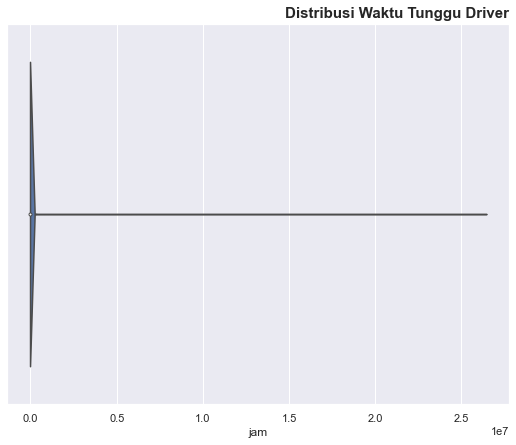

In [13]:
plt.figure(figsize=(9, 7))
sns.violinplot(x=uber_df["wait_sec"]/3600)

plt.title(
    "Distribusi Waktu Tunggu Driver",
    loc="right",
    fontweight="bold",
    size=15
)
plt.xlabel("jam");

Waktu driver menunggu penumpang juga terlampau lama yaitu 2.6e+7 jam

In [20]:
# calculate speed in km/h
speed_kmph = (uber_df["dist_meters"] / 1000) / (uber_df["trip_duration"] / 3600)
speed_kmph.describe()

count    9.028700e+04
mean     1.084724e+04
std      2.088596e+06
min     -1.498244e+07
25%      1.029986e+01
50%      1.849948e+01
75%      2.649178e+01
max      5.153961e+08
dtype: float64

Text(0.5, 0, 'km / jam')

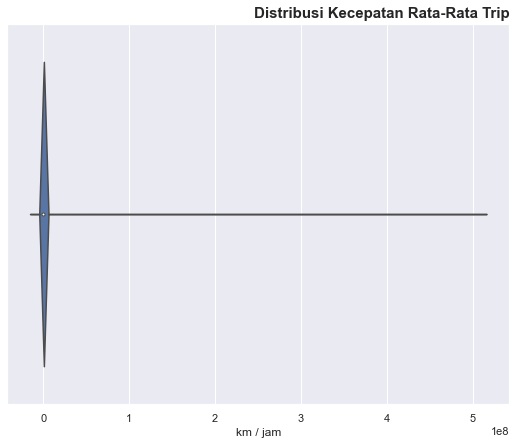

In [21]:
# plot kmph distribution
plt.figure(figsize=(9, 7))
sns.violinplot(x=speed_kmph)

plt.title(
    "Distribusi Kecepatan Rata-Rata Trip",
    loc="right",
    fontweight="bold",
    size=15
)
plt.xlabel("km / jam")

Kecepatan kendaraan juga terdapat data negatif dan yang paling cepat adalah 5.15e+08

In [14]:
# mengubah format date and time
uber_df["pickup_datetime"] = pd.to_datetime(uber_df["pickup_datetime"], format="%Y/%m/%d %H:%M:%S")
uber_df["dropoff_datetime"] = pd.to_datetime(uber_df["dropoff_datetime"], format="%Y/%m/%d %H:%M:%S")

In [15]:
# check max and minimum time
print("pickup & dropoff maximum time is {} {}".format(
    uber_df["pickup_datetime"].dt.time.max(), 
    uber_df["dropoff_datetime"].dt.time.max())
)

print("pickup & dropoff minimum time is {} {}".format(
    uber_df["pickup_datetime"].dt.time.min(), 
    uber_df["dropoff_datetime"].dt.time.min())
)

pickup & dropoff maximum time is 12:59:59 12:59:59
pickup & dropoff minimum time is 01:00:00 01:00:01


Waktu perjalanan saat diterima dan selesai tidak dalam format 24H serta tidak terdapat notasi AM / PM 

## CLEANING, PREPROCESSING, FEATURE ENGINEERING